In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def printMatrix(V):
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            if(j>=2 and i!=0 and V[i][j]==0):
                print("",end="  ")
            else:
                print(f'{V[i][j]:10.04f}' ,  end="  ")
        print()
    print()

# Function for Newton's Divided Difference Method

In [3]:
def NDD(X,Y,a):
    n = len(X)

    NDDTable = np.zeros((n,n+1))

    for i in range(n):
        NDDTable[i][0] = X[i]
        NDDTable[i][1] = Y[i]

    # Calculating Table
    for i in range(2, n+1):
        for j in range(0,n - i+1):
            NDDTable[j][i] = ((NDDTable[j][i - 1] - NDDTable[j + 1][i - 1])/(NDDTable[j][0] - NDDTable[i + j-1][0]))
    
    Poly_deg = 0
    # Calculating interpolation Value
    ans = copy.copy(NDDTable[0][1])
    for i in range(2,n+1):
        p = 1
        for j in range(i-1):
            p *= (a-NDDTable[j][0])
        
        t = (p*NDDTable[0][i])
        if(t!=0):
            Poly_deg +=1
        ans += t
    
    print("Table of Newton's Divided Difference Method:\n")
    printMatrix(NDDTable)

    print(f"\nf({a}) = {ans:3.06f}")
    
    print(f"\nDegree of Polynomial = {Poly_deg}")
    

    lst_for_finding_poly_equation = []
    x = sp.Symbol('x', real=True)
    for i in range(2,n+1):
        lst_tmp = []
        for j in range(i-2,-1,-1):
            lst_tmp.append(X[j])
        lst_for_finding_poly_equation.append(lst_tmp)
    
    return ans,NDDTable,lst_for_finding_poly_equation

In [4]:
def finding_polynomial(table,c_lst):
    x = sp.Symbol('x',real=True)
    
    final_equation = table[0][1]
    m = len(c_lst)
    
    for i in range(m):
        eq_t = 1
        for element in c_lst[i]:
            eq_t *=(x-element)

        eq_t = table[0][i+2]*sp.expand(eq_t)
        final_equation += eq_t

    return final_equation,sp.lambdify(x,final_equation)

# Input Section

In [7]:
# X = np.arange(1,2.5,0.3)
# Y = [0.7651977,0.6200860,0.4554022,0.2818186,0.1103623]

# X = np.array([1,3,4,6,10])
# Y = np.array([0,18,48,180,900])

X = np.arange(0,2.0,0.5)
Y = np.zeros(len(X))
for i in range(len(X)):
    Y[i] = X[i]*math.exp(X[i])

a = 1.5

In [8]:
print(X)
print(Y)

[0.  0.5 1.  1.5]
[0.         0.82436064 2.71828183 6.72253361]


In [9]:
ans,table,lst_for_finding_poly_equation = NDD(X, Y, a)

Table of Newton's Divided Difference Method:

    0.0000      0.0000      1.6487      2.1391      1.3877  
    0.5000      0.8244      3.7878      4.2207    
    1.0000      2.7183      8.0085      
    1.5000      6.7225        


f(1.5) = 6.722534

Degree of Polynomial = 3


In [10]:
print(lst_for_finding_poly_equation)

[[0.0], [0.5, 0.0], [1.0, 0.5, 0.0]]


# Finding Equation of approximating polynomial

In [11]:
expression, lambdified_expression = finding_polynomial(table,lst_for_finding_poly_equation)
expression

1.38769336824021*x**3 + 0.0575810631575244*x**2 + 1.27300739706131*x

In [9]:
lambdified_expression(a)

0.5118199942386827

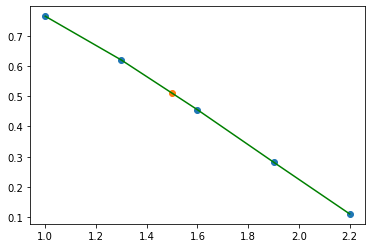

In [10]:
plt.scatter(X,Y)
plt.plot(X,Y,'g')
plt.scatter(a,ans)
plt.show()